In [7]:
import numpy as np
import matplotlib.pyplot as plt

from CADMium import Pssolver
from CADMium import Psgrid
from CADMium import Partition
from CADMium import Inverter

a = 6/2
#Nuclear charge for fragments A and B
Za, Zb = 2,2
#Set polarization 1-Unpolarized, 2-Polarized
pol = 1
#Fragment a electrons [alpha, beta]
Nmo_a = [[1]] #Number of molecular orbitals to calculate
N_a   = [[2]]
#Ensemble mix
nu_a = 1
#Fragment b electrons
Nmo_b = [[1]]
N_b   = [[2]]
#Ensemble mix
nu_b = 1

#Molecular elctron configuration
Nmo_m = [[2]]
N_m   = [[4]]

opt = {   
"kinetic_part_type" : "inversion",
"AB_SYM" : True,
"ENS_SPIN_SYM" : False,
}


#Set up grid
NP = 7
NM = [4,4]
L = np.arccosh(15/a)
loc = np.array(range(-4,5)) #Stencil outline

grid = Psgrid(NP, NM, a, L, loc)
grid.initialize()

part = Partition(grid, Za, Zb, pol, Nmo_a, N_a, nu_a, Nmo_b, N_b, nu_b, opt)

#Setup inverter object
mol_solver = Pssolver(grid, Nmo_m, N_m)
part.inverter = Inverter(grid, mol_solver, {"disp"         : True,
                                            "invert_type"  : "wuyang", 
                                            "ab_sym"       : True,
                                            "ens_spin_sym" : False})

part.scf({"disp" : True})

                Total Energy ( a.u.)                               Inversion                

                __________________                ____________________________________     

Iteration         A              B                  iters      optimality        res       

___________________________________________________________________________________________ 

    1            -3.10758        -3.10758            18       +7.264e-04      +1.000e+00
    2            -2.82916        -2.82916            31       +1.703e-08      +4.110e-01
    3            -2.78698        -2.78698            14       +1.604e-08      +7.248e-02
    4            -2.83351        -2.83351            14       +7.355e-08      +5.904e-02
    5            -2.84375        -2.84375            14       +1.346e-07      +1.364e-02
    6            -2.83536        -2.83536            15       +1.253e-07      +1.076e-02
    7            -2.83369        -2.83369            15       +5.585e-08      +2.191e-03
   

In [8]:
part.inverter.solver

array([[<CADMium.pssolver.pssolver.i_solver object at 0x7fc39eaae370>]],
      dtype=object)

In [9]:

full, x,y = grid.plotter(part.V.vp[:,0])
x_axis,vp = grid.axis_plot(part.V.vp[:,0])

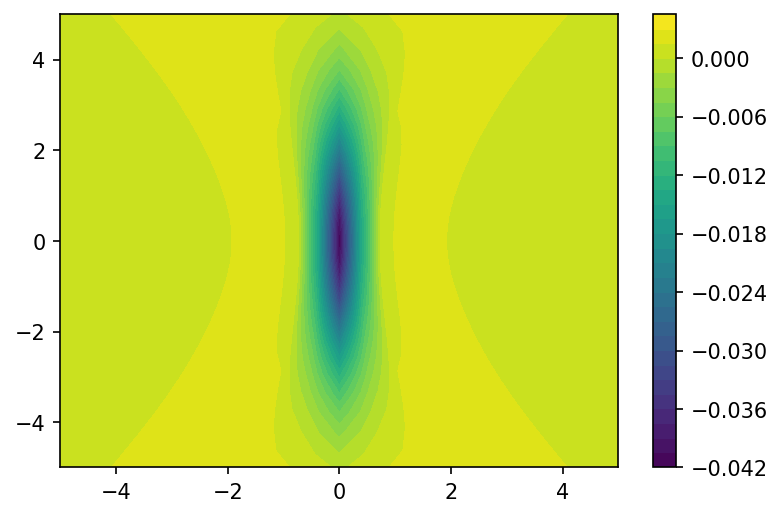

In [10]:
fig = plt.figure(dpi=150)
plt.contourf(x,y,full, levels=30, cmap="viridis")
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.colorbar()

(0.0, 5.0)

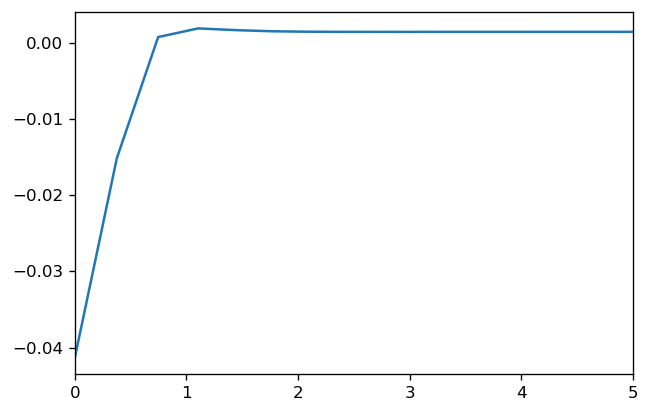

In [11]:
fig = plt.figure(dpi=120)
plt.plot(x_axis,vp)
plt.xlim(0,5)

In [ ]:
part.E.__dict__